In [24]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

## Sample from Train Data
It's necessary to take a sample here, because there is so much data. Even sampling just 50 individual time series, we end up with nearly 500 rows of data.  

In [2]:
def sample_from_index(hdf5_file, index_file, num_series=100):
    """
    Samples full time series from an HDF5 file using precomputed indices in an index CSV.

    Parameters:
        hdf5_file (str): Path to the main dataset HDF5 file.
        index_file (str): Path to the CSV index file storing time series indices.
        num_series (int): Number of full time series to sample.

    Returns:
        sampled_X (np.array): Sampled feature data.
        sampled_y (np.array): Corresponding labels.
    """
    index_df = pd.read_csv(index_file)

    # randomly sample num_series time series
    num_series = min(num_series, len(index_df))
    sampled_series = index_df.sample(num_series)

    sampled_rows = []
    for _, row in sampled_series.iterrows():
        sampled_rows.extend(range(row["start_idx"], row["stop_idx"] + 1))
    sampled_rows = sorted(sampled_rows)

    # load only the required rows
    with h5py.File(hdf5_file, "r") as infile:
        columns = [col.decode("utf-8") for col in infile.attrs["columns"]]
        sampled_X = infile["X"][sampled_rows]
        sampled_y = infile["y"][sampled_rows]

    print(f"Sampled {len(sampled_X)} rows covering {num_series} full time series.")
    return sampled_X, sampled_y, columns


In [18]:
X, y, cols = sample_from_index("engine_train.h5", "engine_index.csv", num_series=50)

Sampled 499479 rows covering 50 full time series.


In [27]:
cols

['alt',
 'Mach',
 'TRA',
 'T2',
 'T24',
 'T30',
 'T48',
 'T50',
 'P15',
 'P2',
 'P21',
 'P24',
 'Ps30',
 'P40',
 'P50',
 'Nf',
 'Nc',
 'Wf',
 'T40',
 'P30',
 'P45',
 'W21',
 'W22',
 'W25',
 'W31',
 'W32',
 'W48',
 'W50',
 'SmFan',
 'SmLPC',
 'SmHPC',
 'phi',
 'fan_eff_mod',
 'fan_flow_mod',
 'LPC_eff_mod',
 'LPC_flow_mod',
 'HPC_eff_mod',
 'HPC_flow_mod',
 'HPT_eff_mod',
 'HPT_flow_mod',
 'LPT_eff_mod',
 'LPT_flow_mod',
 'unit',
 'cycle',
 'Fc',
 'hs']

## Basic EDA
#### Start with basic investigation of the data

In [19]:
y = y.reshape((y.shape[0], 1))
df = pd.DataFrame(np.concatenate((X, y), axis=1), columns=cols+["RUL"])
df.head()

,alt,Mach,TRA,T2,T24,T30,T48,T50,P15,P2,...,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle,Fc,hs,RUL
0,3005.0,0.371385,73.388153,521.965759,621.228516,1480.673340,1884.331421,1289.650757,19.577419,14.451494,...,0.0,-0.006212,0.0,0.0,0.0,2.0,57.0,3.0,0.0,18.0
1,3009.0,0.372078,73.388153,522.004456,621.261658,1480.694824,1884.369629,1289.649658,19.580671,14.454624,...,0.0,-0.006212,0.0,0.0,0.0,2.0,57.0,3.0,0.0,18.0
2,3012.0,0.372897,73.388153,522.053406,621.312927,1480.754761,1884.412231,1289.629150,19.585890,14.458969,...,0.0,-0.006212,0.0,0.0,0.0,2.0,57.0,3.0,0.0,18.0
3,3024.0,0.373149,73.388153,522.029541,621.297241,1480.714966,1884.257080,1289.458618,19.580601,14.454545,...,0.0,-0.006212,0.0,0.0,0.0,2.0,57.0,3.0,0.0,18.0
4,3029.0,0.373086,73.476036,522.009155,621.313904,1480.951782,1885.066528,1289.969360,19.579657,14.451669,...,0.0,-0.006212,0.0,0.0,0.0,2.0,57.0,3.0,0.0,18.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499479 entries, 0 to 499478
Data columns (total 47 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   alt           499479 non-null  float32
 1   Mach          499479 non-null  float32
 2   TRA           499479 non-null  float32
 3   T2            499479 non-null  float32
 4   T24           499479 non-null  float32
 5   T30           499479 non-null  float32
 6   T48           499479 non-null  float32
 7   T50           499479 non-null  float32
 8   P15           499479 non-null  float32
 9   P2            499479 non-null  float32
 10  P21           499479 non-null  float32
 11  P24           499479 non-null  float32
 12  Ps30          499479 non-null  float32
 13  P40           499479 non-null  float32
 14  P50           499479 non-null  float32
 15  Nf            499479 non-null  float32
 16  Nc            499479 non-null  float32
 17  Wf            499479 non-null  float32
 18  T40 

In [21]:
df.describe()

,alt,Mach,TRA,T2,T24,T30,T48,T50,P15,P2,...,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle,Fc,hs,RUL
count,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,...,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000,499479.000000
mean,17323.142578,0.555504,62.481007,485.879730,566.239197,1327.131104,1637.170410,1120.887695,12.323519,9.565259,...,-0.000933,-0.001473,-0.000371,-0.001234,-0.001920,5.278556,35.195305,2.612612,0.241536,39.490414
std,7889.671387,0.112991,17.542747,20.017004,21.216993,66.194115,117.781364,60.925732,2.835287,2.371017,...,0.001788,0.001972,0.001039,0.002439,0.003923,4.331089,19.219242,0.610237,0.427012,22.707388
min,3001.000000,0.201726,23.818190,444.473907,500.769806,1106.906982,1129.658691,821.452942,7.123603,5.618098,...,-0.007256,-0.008888,-0.005607,-0.011163,-0.015899,1.000000,1.000000,1.000000,0.000000,3.000000
25%,10746.000000,0.475587,49.394180,469.389648,550.753845,1283.755188,1563.743042,1081.062744,9.929463,7.511378,...,-0.001346,-0.001704,0.000000,-0.001879,-0.002029,2.000000,20.000000,2.000000,0.000000,18.000000
50%,17151.000000,0.568197,68.026863,487.077087,563.551270,1325.023438,1647.287720,1110.456299,12.190674,9.454291,...,0.000000,-0.000918,0.000000,0.000000,0.000000,4.000000,34.000000,3.000000,0.000000,35.000000
75%,23996.000000,0.646128,77.518982,503.677155,580.833740,1367.041321,1699.947021,1158.190186,14.592772,11.612359,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,50.000000,3.000000,0.000000,58.000000
max,31026.000000,0.737667,86.483757,525.415955,629.192688,1515.849854,1939.859131,1319.544067,19.994335,14.784272,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,73.000000,3.000000,1.000000,94.000000


#### Check for and possibly handle missing data
There is no missing data.

In [22]:
df.isnull().sum()

alt             0
Mach            0
TRA             0
T2              0
T24             0
T30             0
T48             0
T50             0
P15             0
P2              0
P21             0
P24             0
Ps30            0
P40             0
P50             0
Nf              0
Nc              0
Wf              0
T40             0
P30             0
P45             0
W21             0
W22             0
W25             0
W31             0
W32             0
W48             0
W50             0
SmFan           0
SmLPC           0
SmHPC           0
phi             0
fan_eff_mod     0
fan_flow_mod    0
LPC_eff_mod     0
LPC_flow_mod    0
HPC_eff_mod     0
HPC_flow_mod    0
HPT_eff_mod     0
HPT_flow_mod    0
LPT_eff_mod     0
LPT_flow_mod    0
unit            0
cycle           0
Fc              0
hs              0
RUL             0
dtype: int64

#### RUL Distribution and Failure Trends

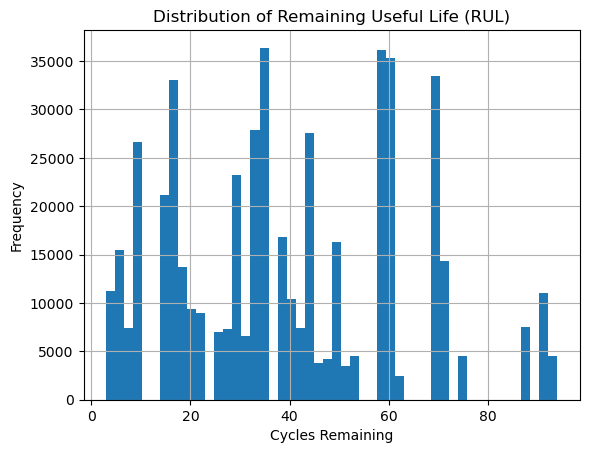

In [23]:
df["RUL"].hist(bins=50)
plt.title("Distribution of Remaining Useful Life (RUL)")
plt.xlabel("Cycles Remaining")
plt.ylabel("Frequency")
plt.show()

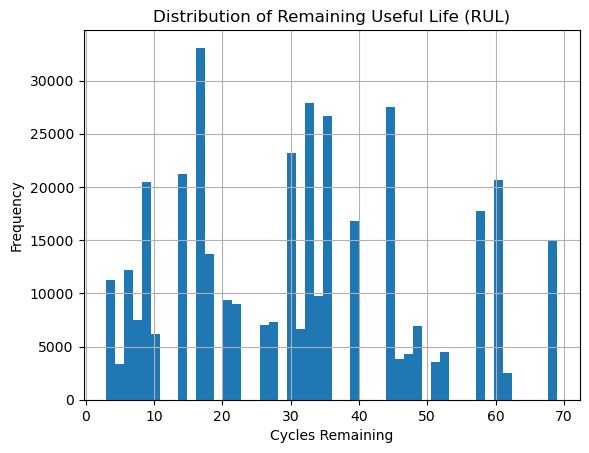

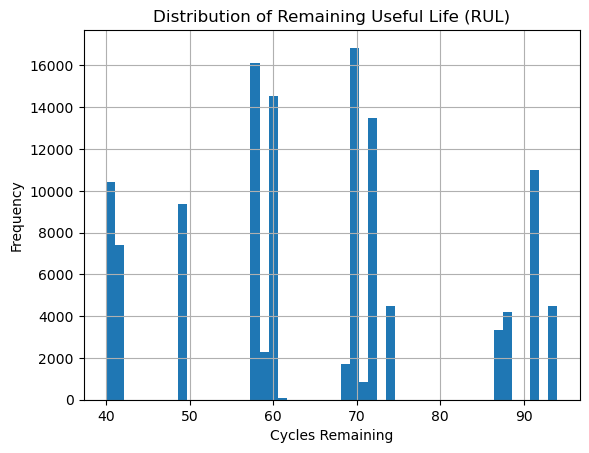

In [29]:
bad_engine = df[df["hs"]==0]
good_engine = df[df["hs"]==1]
bad_engine["RUL"].hist(bins=50)
plt.title("Distribution of Remaining Useful Life (RUL)")
plt.xlabel("Cycles Remaining")
plt.ylabel("Frequency")
plt.show()
good_engine["RUL"].hist(bins=50)
plt.title("Distribution of Remaining Useful Life (RUL)")
plt.xlabel("Cycles Remaining")
plt.ylabel("Frequency")
plt.show()

In [ ]:
sensors = ['sensor1', 'sensor2', 'sensor3']  # Replace with actual sensor columns
for sensor in sensors:
    plt.figure(figsize=(10, 4))
    for unit in df["unit"].unique()[:5]:  # Plot a few random engines
        subset = df[df["unit"] == unit]
        plt.plot(subset["time"], subset[sensor], label=f"Unit {unit}")
    plt.title(f"Sensor {sensor} Readings Over Time")
    plt.xlabel("Time (Cycles)")
    plt.ylabel(sensor)
    plt.legend()
    plt.show()